In [1]:
import pandas as pd
from datetime import date, timedelta
import win32com.client as win32
import teradatasql
import datetime
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
import matplotlib.pyplot as plt
import pygwalker as pyg
#pyg.walk(df)

In [58]:
user="vitaly.flerin"
password="4GyyERMq!!"
query = '''select * from uat_ca.vf_ninarich_sms_flag_nov_2'''

In [59]:
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df = pd.read_sql(query, connect)
df

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,create_date,subs_id,Region,branch_id,Lifetime,point_name,class_mark_6,nps,ltr,subs_flg_nina,up_price,sms_ind
0,2022-12-23,5.562719e+07,Курск,35.0,36+,Контакт-центр,None,-1,3,5.562719e+07,35,5.562719e+07
1,2023-02-16,2.000846e+11,Н.Новгород,13.0,36+,Контакт-центр,None,1,9,2.000846e+11,30,NaN
2,2022-12-01,1.000608e+11,Новосибирск,23.0,36+,Мобильный интернет,None,-1,1,1.000608e+11,70,1.000608e+11
3,2022-11-30,1.000352e+11,Иркутск,61.0,36+,Тарифы,None,1,10,1.000352e+11,60,1.000352e+11
4,2023-02-20,1.000230e+11,Томск,24.0,36+,Мобильный интернет,None,1,10,1.000230e+11,50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
316510,2023-02-01,1.000763e+11,Магадан,43.0,13-24,Контакт-центр,None,-1,1,NaN,None,NaN
316511,2022-11-14,1.000621e+11,Красноярск,62.0,36+,Мобильный интернет,None,1,10,NaN,None,NaN
316512,2022-12-13,6.904721e+07,Тамбов,29.0,4-6,Контакт-центр,None,1,10,NaN,None,NaN
316513,2023-01-12,1.000823e+11,Владивосток,68.0,4-6,Контакт-центр,"абонентская служба ( вежливость, работа персо...",-1,1,NaN,None,NaN


In [60]:
df['year'] = pd.DatetimeIndex(df['create_date']).year
df['month'] = pd.DatetimeIndex(df['create_date']).month
df

,create_date,subs_id,Region,branch_id,Lifetime,point_name,class_mark_6,nps,ltr,subs_flg_nina,up_price,sms_ind,year,month
0,2022-12-23,5.562719e+07,Курск,35.0,36+,Контакт-центр,None,-1,3,5.562719e+07,35,5.562719e+07,2022,12
1,2023-02-16,2.000846e+11,Н.Новгород,13.0,36+,Контакт-центр,None,1,9,2.000846e+11,30,NaN,2023,2
2,2022-12-01,1.000608e+11,Новосибирск,23.0,36+,Мобильный интернет,None,-1,1,1.000608e+11,70,1.000608e+11,2022,12
3,2022-11-30,1.000352e+11,Иркутск,61.0,36+,Тарифы,None,1,10,1.000352e+11,60,1.000352e+11,2022,11
4,2023-02-20,1.000230e+11,Томск,24.0,36+,Мобильный интернет,None,1,10,1.000230e+11,50,NaN,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316510,2023-02-01,1.000763e+11,Магадан,43.0,13-24,Контакт-центр,None,-1,1,NaN,None,NaN,2023,2
316511,2022-11-14,1.000621e+11,Красноярск,62.0,36+,Мобильный интернет,None,1,10,NaN,None,NaN,2022,11
316512,2022-12-13,6.904721e+07,Тамбов,29.0,4-6,Контакт-центр,None,1,10,NaN,None,NaN,2022,12
316513,2023-01-12,1.000823e+11,Владивосток,68.0,4-6,Контакт-центр,"абонентская служба ( вежливость, работа персо...",-1,1,NaN,None,NaN,2023,1


In [61]:
#nps тех, кому отпрвили смс 
nps_in_sms = df[df[['sms_ind']].notnull().all(1)].groupby('point_name').agg({'nps':['mean', 'count']}).reset_index()
nps_in_sms.columns = ['_'.join(col).strip() for col in nps_in_sms.columns.values]
print(nps_in_sms)
#nps тех, кому не отпрвили смс, но попал в нину 
nps_no_sms = df[(df[['sms_ind']].isnull().all(1) & df[['subs_flg_nina']].notnull().all(1))].groupby('point_name').agg({'nps':['mean', 'count']}).reset_index() 
nps_no_sms.columns = ['_'.join(col).strip() for col in nps_no_sms.columns.values]
print(nps_no_sms)
#nps тех, кому не отпрвили смс, и не попал в нину 
nps_no_sms_nina_r = df[(df[['sms_ind']].isnull().all(1) & df[['subs_flg_nina']].isnull().all(1))].groupby('point_name').agg({'nps':['mean', 'count']}).reset_index() 
nps_no_sms_nina_r.columns = ['_'.join(col).strip() for col in nps_no_sms_nina_r.columns.values]
print(nps_no_sms_nina_r)

          point_name_  nps_mean  nps_count
0       Контакт-центр  0.081193      21332
1  Мобильный интернет  0.179892      56784
2              Тарифы  0.398292      13465
          point_name_  nps_mean  nps_count
0       Контакт-центр  0.085172      20300
1  Мобильный интернет  0.261302      96838
2              Тарифы  0.469401      21945
          point_name_  nps_mean  nps_count
0       Контакт-центр  0.322098      20441
1  Мобильный интернет  0.344016      50175
2              Тарифы  0.550968      15235


          point_name_  nps_mean  nps_count         flg_sms
0       Контакт-центр  0.085172      20300         yes sms
1  Мобильный интернет  0.261302      96838         yes sms
2              Тарифы  0.469401      21945         yes sms
0       Контакт-центр  0.081193      21332  no sms, yes nr
1  Мобильный интернет  0.179892      56784  no sms, yes nr
2              Тарифы  0.398292      13465  no sms, yes nr
0       Контакт-центр  0.322098      20441   no sms, no nr
1  Мобильный интернет  0.344016      50175   no sms, no nr
2              Тарифы  0.550968      15235   no sms, no nr


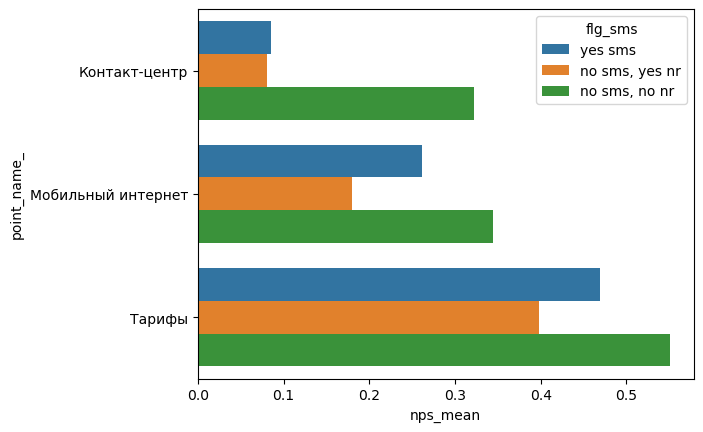

In [62]:
nps_in_sms['flg_sms'] = 'no sms, yes nr'
nps_no_sms['flg_sms'] = 'yes sms'
nps_no_sms_nina_r['flg_sms'] = 'no sms, no nr'
df_svod = pd.concat([nps_no_sms, nps_in_sms, nps_no_sms_nina_r])

sns.barplot(data=df_svod, x ='nps_mean', y ='point_name_' , hue='flg_sms')
print(df_svod)

помесячно

In [63]:
#nps тех, кому отпрвили смс 
nps_in_sms = df[df[['sms_ind']].notnull().all(1)].groupby(['point_name', 'month']).agg({'nps':['mean', 'count']}).reset_index()
nps_in_sms.columns = ['_'.join(col).strip() for col in nps_in_sms.columns.values]
print(nps_in_sms)
#nps тех, кому не отпрвили смс, но попал в нину 
nps_no_sms = df[(df[['sms_ind']].isnull().all(1) & df[['subs_flg_nina']].notnull().all(1))].groupby(['point_name', 'month']).agg({'nps':['mean', 'count']}).reset_index() 
nps_no_sms.columns = ['_'.join(col).strip() for col in nps_no_sms.columns.values]
print(nps_no_sms)
#nps тех, кому не отпрвили смс, и не попал в нину 
nps_no_sms_nina_r = df[(df[['sms_ind']].isnull().all(1) & df[['subs_flg_nina']].isnull().all(1))].groupby(['point_name', 'month']).agg({'nps':['mean', 'count']}).reset_index() 
nps_no_sms_nina_r.columns = ['_'.join(col).strip() for col in nps_no_sms_nina_r.columns.values]
print(nps_no_sms_nina_r)

           point_name_  month_  nps_mean  nps_count
0        Контакт-центр       1  0.034536       4517
1        Контакт-центр       2  0.114211       4588
2        Контакт-центр       3  0.247171       1149
3        Контакт-центр      11  0.246729       2675
4        Контакт-центр      12  0.012853       8403
5   Мобильный интернет       1  0.131953       9996
6   Мобильный интернет       2  0.135057      11721
7   Мобильный интернет       3  0.171860       5359
8   Мобильный интернет      11  0.249519      14568
9   Мобильный интернет      12  0.182100      15140
10              Тарифы       1  0.303326       2255
11              Тарифы       2  0.313706       3006
12              Тарифы       3  0.364177       1178
13              Тарифы      11  0.560263       3352
14              Тарифы      12  0.388949       3674
           point_name_  month_  nps_mean  nps_count
0        Контакт-центр       1 -0.084179       5619
1        Контакт-центр       2  0.046163       5199
2        Кон

           point_name_  month_  nps_mean  nps_count         flg_sms
3        Контакт-центр      11  0.203958       3133         yes sms
8   Мобильный интернет      11  0.293559      25678         yes sms
13              Тарифы      11  0.594870       5497         yes sms
3        Контакт-центр      11  0.246729       2675  no sms, yes nr
8   Мобильный интернет      11  0.249519      14568  no sms, yes nr
13              Тарифы      11  0.560263       3352  no sms, yes nr
3        Контакт-центр      11  0.294849       4426   no sms, no nr
8   Мобильный интернет      11  0.313889      12240   no sms, no nr
13              Тарифы      11  0.522424       3746   no sms, no nr


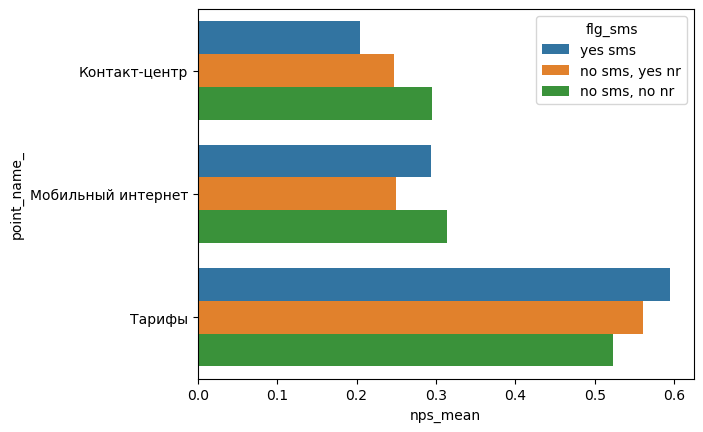

In [64]:
nps_in_sms['flg_sms'] = 'no sms, yes nr'
nps_no_sms['flg_sms'] = 'yes sms'
nps_no_sms_nina_r['flg_sms'] = 'no sms, no nr'
df_svod = pd.concat([nps_no_sms, nps_in_sms, nps_no_sms_nina_r])

sns.barplot(data=df_svod[df_svod['month_']==11], x ='nps_mean', y ='point_name_' , hue='flg_sms', errorbar=('ci', 80))
print(df_svod[df_svod['month_']==11])

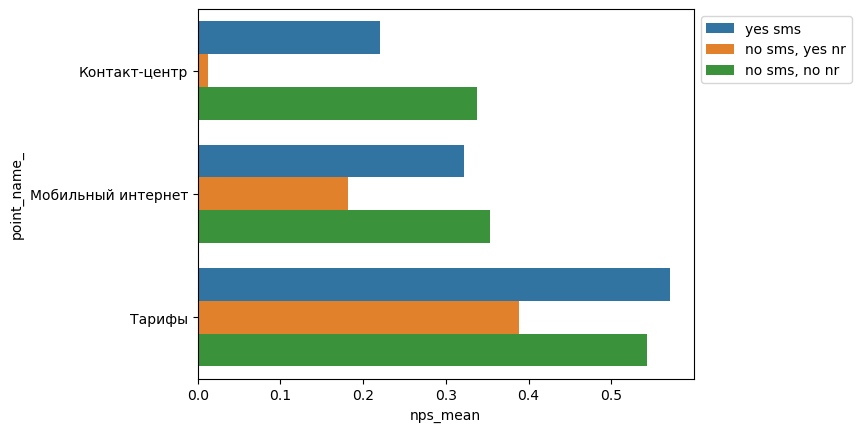

           point_name_  month_  nps_mean  nps_count         flg_sms
4        Контакт-центр      12  0.220645       5144         yes sms
9   Мобильный интернет      12  0.321945      25026         yes sms
14              Тарифы      12  0.571210       5891         yes sms
4        Контакт-центр      12  0.012853       8403  no sms, yes nr
9   Мобильный интернет      12  0.182100      15140  no sms, yes nr
14              Тарифы      12  0.388949       3674  no sms, yes nr
4        Контакт-центр      12  0.337677       7214   no sms, no nr
9   Мобильный интернет      12  0.353321      12558   no sms, no nr
14              Тарифы      12  0.543283       3893   no sms, no nr


In [65]:
sns.barplot(data=df_svod[df_svod['month_']==12], x ='nps_mean', y ='point_name_' , hue='flg_sms', errorbar=('ci', 80))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print(df_svod[df_svod['month_']==12])

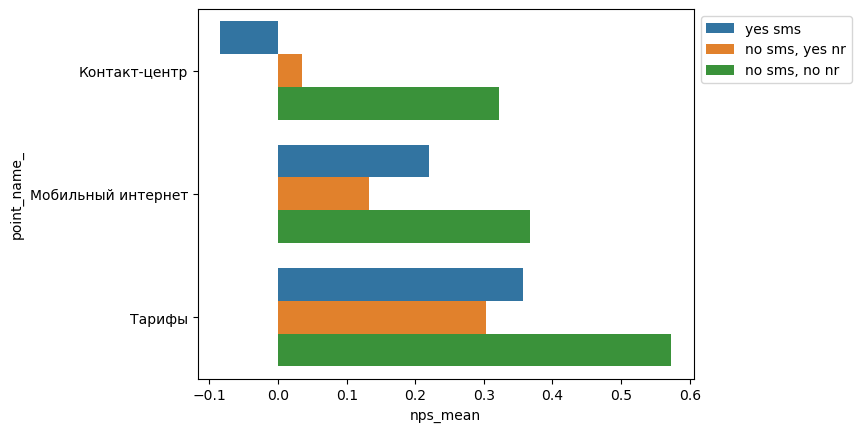

           point_name_  month_  nps_mean  nps_count         flg_sms
0        Контакт-центр       1 -0.084179       5619         yes sms
5   Мобильный интернет       1  0.220583      16606         yes sms
10              Тарифы       1  0.356695       3667         yes sms
0        Контакт-центр       1  0.034536       4517  no sms, yes nr
5   Мобильный интернет       1  0.131953       9996  no sms, yes nr
10              Тарифы       1  0.303326       2255  no sms, yes nr
0        Контакт-центр       1  0.321322       3358   no sms, no nr
5   Мобильный интернет       1  0.367001       8861   no sms, no nr
10              Тарифы       1  0.573099       2565   no sms, no nr


In [66]:
sns.barplot(data=df_svod[df_svod['month_']==1], x ='nps_mean', y ='point_name_' , hue='flg_sms', errorbar=('ci', 80))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print(df_svod[df_svod['month_']==1])

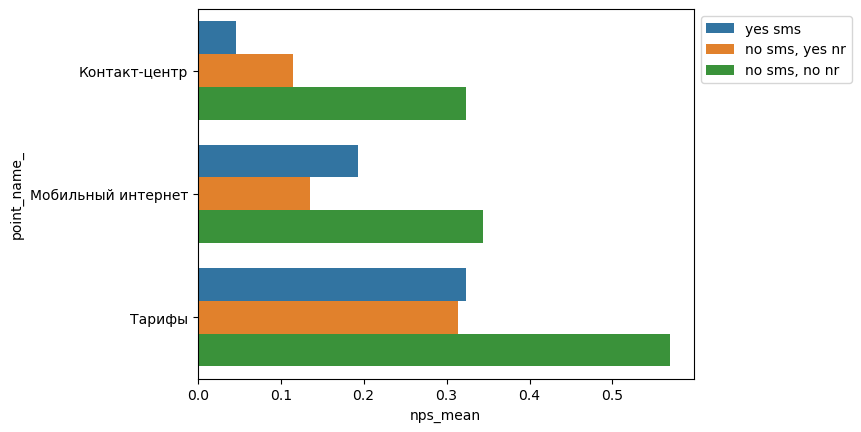

           point_name_  month_  nps_mean  nps_count         flg_sms
1        Контакт-центр       2  0.046163       5199         yes sms
6   Мобильный интернет       2  0.193692      20197         yes sms
11              Тарифы       2  0.323667       4931         yes sms
1        Контакт-центр       2  0.114211       4588  no sms, yes nr
6   Мобильный интернет       2  0.135057      11721  no sms, yes nr
11              Тарифы       2  0.313706       3006  no sms, yes nr
1        Контакт-центр       2  0.323127       4311   no sms, no nr
6   Мобильный интернет       2  0.344148      11312   no sms, no nr
11              Тарифы       2  0.569620       3555   no sms, no nr


In [67]:
sns.barplot(data=df_svod[df_svod['month_']==2], x ='nps_mean', y ='point_name_' , hue='flg_sms')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print(df_svod[df_svod['month_']==2])

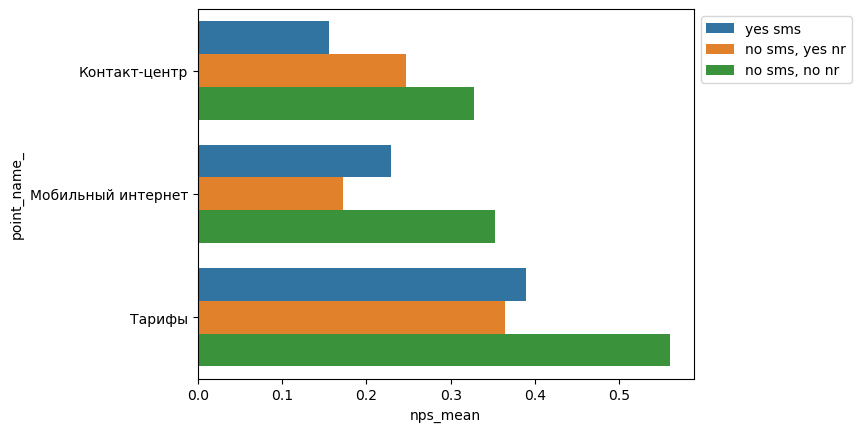

           point_name_  month_  nps_mean  nps_count         flg_sms
2        Контакт-центр       3  0.156017       1205         yes sms
7   Мобильный интернет       3  0.228700       9331         yes sms
12              Тарифы       3  0.388974       1959         yes sms
2        Контакт-центр       3  0.247171       1149  no sms, yes nr
7   Мобильный интернет       3  0.171860       5359  no sms, yes nr
12              Тарифы       3  0.364177       1178  no sms, yes nr
2        Контакт-центр       3  0.327739       1132   no sms, no nr
7   Мобильный интернет       3  0.352998       5204   no sms, no nr
12              Тарифы       3  0.560298       1476   no sms, no nr


In [68]:
sns.barplot(data=df_svod[df_svod['month_']==3], x ='nps_mean', y ='point_name_' , hue='flg_sms')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print(df_svod[df_svod['month_']==3])

In [69]:
cut=df[df['up_price'].notnull()].copy()
cut['up_price'] = cut['up_price'].str.replace(',', '.').str.replace(' ', '')
cut['up_price'] = cut['up_price'].astype (float)
cut['quantile_ex_1'] = pd.qcut(cut['up_price'], q=4)
cut['quantile_ex_1'].value_counts()
sum_df = pd.merge(df, cut[['subs_id', 'create_date','quantile_ex_1']], how='left', left_on=['subs_id', 'create_date'], right_on = ['subs_id', 'create_date']) # merge
sum_df

,create_date,subs_id,Region,branch_id,Lifetime,point_name,class_mark_6,nps,ltr,subs_flg_nina,up_price,sms_ind,year,month,quantile_ex_1
0,2022-12-23,5.562719e+07,Курск,35.0,36+,Контакт-центр,None,-1,3,5.562719e+07,35,5.562719e+07,2022,12,"(0.199, 40.0]"
1,2023-02-16,2.000846e+11,Н.Новгород,13.0,36+,Контакт-центр,None,1,9,2.000846e+11,30,NaN,2023,2,"(0.199, 40.0]"
2,2022-12-01,1.000608e+11,Новосибирск,23.0,36+,Мобильный интернет,None,-1,1,1.000608e+11,70,1.000608e+11,2022,12,"(60.0, 115.0]"
3,2022-11-30,1.000352e+11,Иркутск,61.0,36+,Тарифы,None,1,10,1.000352e+11,60,1.000352e+11,2022,11,"(50.0, 60.0]"
4,2023-02-20,1.000230e+11,Томск,24.0,36+,Мобильный интернет,None,1,10,1.000230e+11,50,NaN,2023,2,"(40.0, 50.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320858,2023-02-01,1.000763e+11,Магадан,43.0,13-24,Контакт-центр,None,-1,1,NaN,None,NaN,2023,2,NaN
320859,2022-11-14,1.000621e+11,Красноярск,62.0,36+,Мобильный интернет,None,1,10,NaN,None,NaN,2022,11,NaN
320860,2022-12-13,6.904721e+07,Тамбов,29.0,4-6,Контакт-центр,None,1,10,NaN,None,NaN,2022,12,NaN
320861,2023-01-12,1.000823e+11,Владивосток,68.0,4-6,Контакт-центр,"абонентская служба ( вежливость, работа персо...",-1,1,NaN,None,NaN,2023,1,NaN


In [70]:
sum_df['quantile_ex_1'].value_counts()

(0.199, 40.0]    77870
(50.0, 60.0]     67347
(40.0, 50.0]     51452
(60.0, 115.0]    38343
Name: quantile_ex_1, dtype: int64

bucket

In [71]:
#разбивка по бабкам, 22/23 гг
sum_df_2022 = sum_df[sum_df['year'] == 2022]
sum_df_2023 = sum_df[sum_df['year'] == 2023]

In [72]:
#2022
#nps тех, кому отпрвили смс 
nps_in_sms_b = sum_df_2022[sum_df_2022[['sms_ind']].notnull().all(1)].groupby(['point_name', 'quantile_ex_1']).agg({'nps':['mean', 'count']}).reset_index()
nps_in_sms_b.columns = ['_'.join(col).strip() for col in nps_in_sms_b.columns.values]
print(nps_in_sms_b)
#nps тех, кому не отпрвили смс, но попал в нину 
nps_no_sms_b = sum_df_2022[(sum_df_2022[['sms_ind']].isnull().all(1) & sum_df[['subs_flg_nina']].notnull().all(1))].groupby(['point_name', 'quantile_ex_1']).agg({'nps':['mean', 'count']}).reset_index() 
nps_no_sms_b.columns = ['_'.join(col).strip() for col in nps_no_sms_b.columns.values]
print(nps_no_sms_b)

           point_name_ quantile_ex_1_  nps_mean  nps_count
0        Контакт-центр  (0.199, 40.0]  0.117629       3307
1        Контакт-центр   (40.0, 50.0]  0.068842       2237
2        Контакт-центр   (50.0, 60.0]  0.104694       3238
3        Контакт-центр  (60.0, 115.0] -0.047218       2372
4   Мобильный интернет  (0.199, 40.0]  0.258910       8586
5   Мобильный интернет   (40.0, 50.0]  0.226673       6141
6   Мобильный интернет   (50.0, 60.0]  0.267658       7872
7   Мобильный интернет  (60.0, 115.0]  0.110897       7791
8               Тарифы  (0.199, 40.0]  0.524292       2367
9               Тарифы   (40.0, 50.0]  0.473762       1353
10              Тарифы   (50.0, 60.0]  0.499461       1854
11              Тарифы  (60.0, 115.0]  0.371959       1562
           point_name_ quantile_ex_1_  nps_mean  nps_count
0        Контакт-центр  (0.199, 40.0]  0.204380       3014
1        Контакт-центр   (40.0, 50.0]  0.189103       1872
2        Контакт-центр   (50.0, 60.0]  0.244436       25

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_11816\197439727.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nps_no_sms_b = sum_df_2022[(sum_df_2022[['sms_ind']].isnull().all(1) & sum_df[['subs_flg_nina']].notnull().all(1))].groupby(['point_name', 'quantile_ex_1']).agg({'nps':['mean', 'count']}).reset_index()


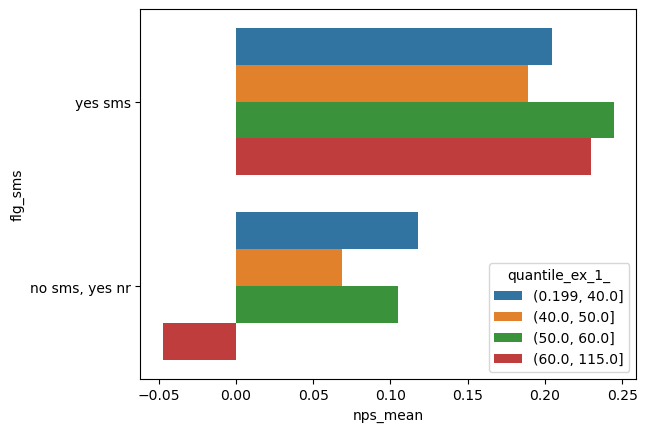

In [73]:
nps_in_sms_b['flg_sms'] = 'no sms, yes nr'
nps_no_sms_b['flg_sms'] = 'yes sms'
# no sms no nr - не могут попасть, тк нет бакетов
df_svod = pd.concat([nps_no_sms_b, nps_in_sms_b])
sns.barplot(data=df_svod[df_svod['point_name_']=='Контакт-центр'], x ='nps_mean', y ='flg_sms' , hue='quantile_ex_1_', errorbar=('ci', 95))
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
#print(df_svod[df_svod['quantile_ex_1']==1])

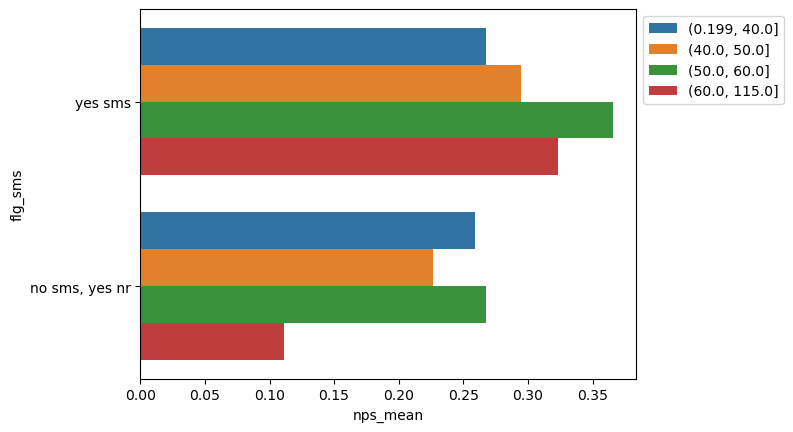

In [74]:
sns.barplot(data=df_svod[df_svod['point_name_']=='Мобильный интернет'], x ='nps_mean', y ='flg_sms' , hue='quantile_ex_1_', errorbar=('ci', 95))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

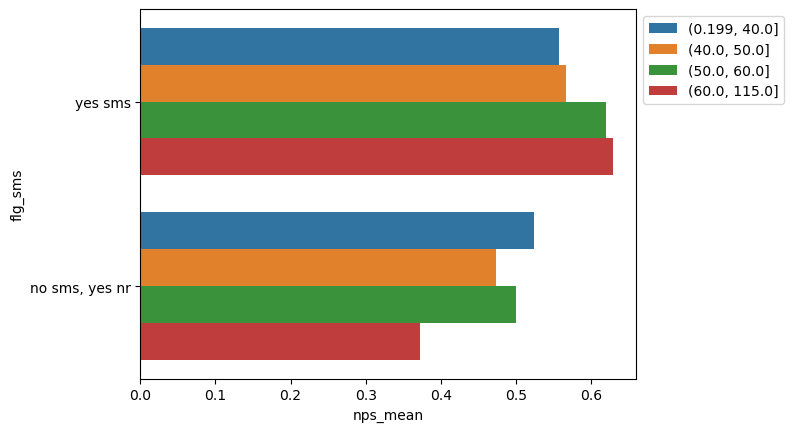

In [75]:
sns.barplot(data=df_svod[df_svod['point_name_']=='Тарифы'], x ='nps_mean', y ='flg_sms' , hue='quantile_ex_1_', errorbar=('ci', 95))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [236]:
#nps тех, кому отпрвили смс 
nps_in_sms_b = sum_df[sum_df[['sms_ind']].notnull().all(1)].groupby(['point_name', 'quantile_ex_1']).agg({'nps':['mean', 'count']}).reset_index()
nps_in_sms_b.columns = ['_'.join(col).strip() for col in nps_in_sms_b.columns.values]
print(nps_in_sms_b)
#nps тех, кому не отпрвили смс, но попал в нину 
nps_no_sms_b = sum_df[(sum_df[['sms_ind']].isnull().all(1) & sum_df[['subs_flg_nina']].notnull().all(1))].groupby(['point_name', 'quantile_ex_1']).agg({'nps':['mean', 'count']}).reset_index() 
nps_no_sms_b.columns = ['_'.join(col).strip() for col in nps_no_sms_b.columns.values]
print(nps_no_sms_b)

           point_name_ quantile_ex_1_  nps_mean  nps_count
0        Контакт-центр  (0.199, 40.0]  0.141356       2950
1        Контакт-центр   (40.0, 50.0]  0.086327       2004
2        Контакт-центр   (50.0, 60.0]  0.133067       3006
3        Контакт-центр   (60.0, 71.0] -0.023810       2226
4   Мобильный интернет  (0.199, 40.0]  0.235054       7343
5   Мобильный интернет   (40.0, 50.0]  0.157233       5247
6   Мобильный интернет   (50.0, 60.0]  0.202315       6910
7   Мобильный интернет   (60.0, 71.0] -0.025372       7252
8               Тарифы  (0.199, 40.0]  0.409789       2084
9               Тарифы   (40.0, 50.0]  0.301689       1243
10              Тарифы   (50.0, 60.0]  0.366475       1569
11              Тарифы   (60.0, 71.0]  0.153231       1501
           point_name_ quantile_ex_1_  nps_mean  nps_count
0        Контакт-центр  (0.199, 40.0]  0.033447       3827
1        Контакт-центр   (40.0, 50.0] -0.041369       2659
2        Контакт-центр   (50.0, 60.0] -0.011935       39

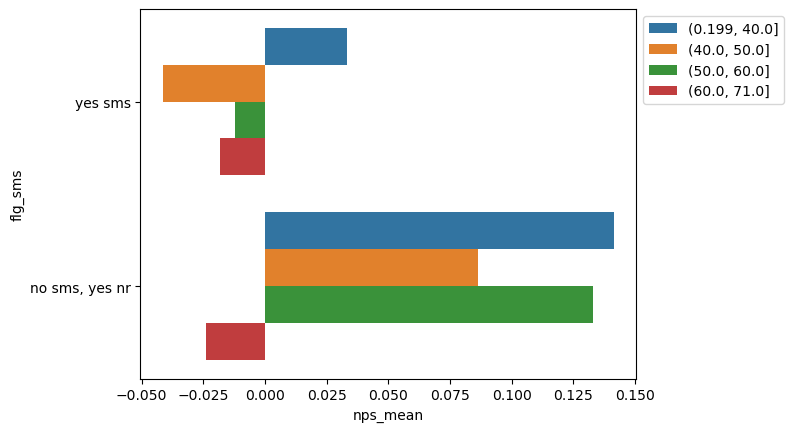

In [237]:
nps_in_sms_b['flg_sms'] = 'no sms, yes nr'
nps_no_sms_b['flg_sms'] = 'yes sms'
# no sms no nr - не могут попасть, тк нет бакетов
df_svod = pd.concat([nps_no_sms_b, nps_in_sms_b])
sns.barplot(data=df_svod[df_svod['point_name_']=='Контакт-центр'], x ='nps_mean', y ='flg_sms' , hue='quantile_ex_1_', errorbar=('ci', 95))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
#print(df_svod[df_svod['quantile_ex_1']==1])


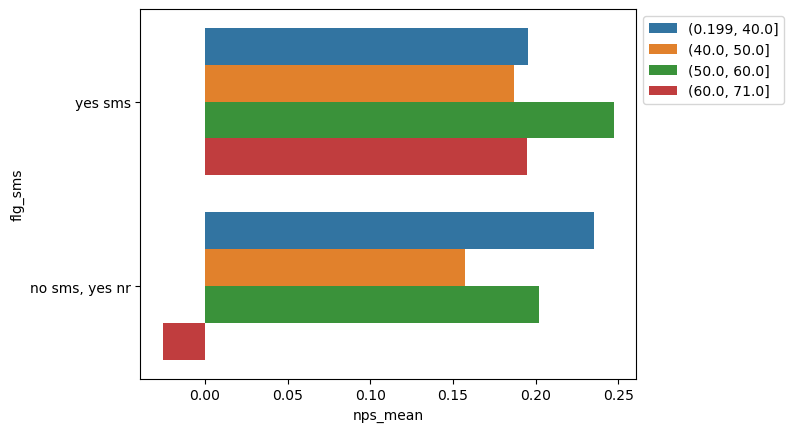

In [238]:
sns.barplot(data=df_svod[df_svod['point_name_']=='Мобильный интернет'], x ='nps_mean', y ='flg_sms' , hue='quantile_ex_1_', errorbar=('ci', 95))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

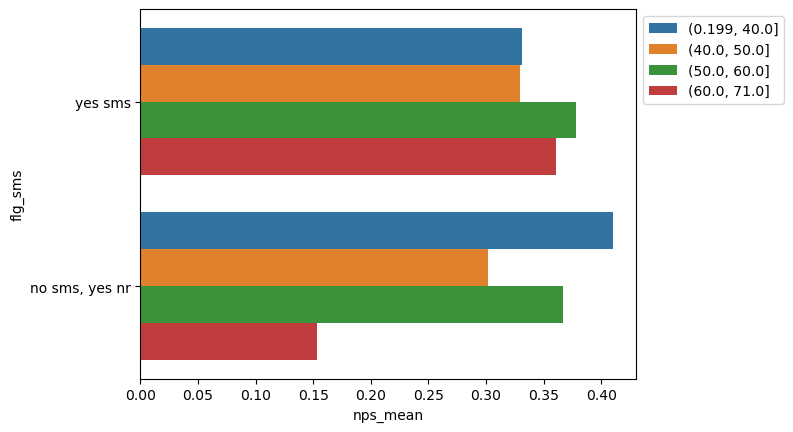

In [239]:
sns.barplot(data=df_svod[df_svod['point_name_']=='Тарифы'], x ='nps_mean', y ='flg_sms' , hue='quantile_ex_1_', errorbar=('ci', 95))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [76]:
sum_df.to_excel('ninaa r_2.xlsx')

In [77]:
user="vitaly.flerin"
password="4GyyERMq!!"
query = '''select * from uat_ca.vf_ninarich_sms_flag_ntd'''

In [78]:
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df = pd.read_sql(query, connect)
df['year'] = pd.DatetimeIndex(df['create_date']).year
df['month'] = pd.DatetimeIndex(df['create_date']).month
df

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,create_date,subs_id,region,point_name,ans_2,ltr,nps,subs_flg_nina,up_price,sms_ind,year,month
0,2022-11-03,2.000422e+11,Н.Новгород,Наш TD,Все устраивает,10,1.0,2.000422e+11,65,2.000422e+11,2022,11
1,2022-11-23,2.000922e+11,С.Петербург,Наш TD,Связь в поездках по России,8,0.0,2.000922e+11,60,NaN,2022,11
2,2023-02-22,2.728609e+07,Липецк,Наш TD,Зона охвата сети (покрытие),10,1.0,2.728609e+07,30,NaN,2023,2
3,2023-01-11,1.990394e+07,Курск,Наш TD,Тарифы,1,-1.0,NaN,None,NaN,2023,1
4,2022-12-23,1.493115e+07,Кемерово,Наш TD,Личный кабинет - Мой Tele2,5,-1.0,NaN,None,NaN,2022,12
...,...,...,...,...,...,...,...,...,...,...,...,...
15572,2023-02-13,1.000812e+11,Бурятия,Наш TD,Другое,-1,NaN,NaN,None,NaN,2023,2
15573,2022-12-28,4.746708e+07,Воронеж,Наш TD,None,2,-1.0,4.746708e+07,45,4.746708e+07,2022,12
15574,2022-12-07,2.000335e+11,В.Новгород,Наш TD,Зона охвата сети (покрытие),9,1.0,2.000335e+11,40,2.000335e+11,2022,12
15575,2022-12-22,4.768570e+07,Белгород,Наш TD,None,10,1.0,4.768570e+07,65,4.768570e+07,2022,12


In [79]:
cut=df[df['up_price'].notnull()].copy()
cut['up_price'] = cut['up_price'].str.replace(',', '.').str.replace(' ', '')
cut['up_price'] = cut['up_price'].astype (float)
cut['quantile_ex_1'] = pd.qcut(cut['up_price'], q=4)
cut['quantile_ex_1'].value_counts()
sum_df = pd.merge(df, cut[['subs_id', 'create_date','quantile_ex_1']], how='left', left_on=['subs_id', 'create_date'], right_on = ['subs_id', 'create_date']) # merge
sum_df

,create_date,subs_id,region,point_name,ans_2,ltr,nps,subs_flg_nina,up_price,sms_ind,year,month,quantile_ex_1
0,2022-11-03,2.000422e+11,Н.Новгород,Наш TD,Все устраивает,10,1.0,2.000422e+11,65,2.000422e+11,2022,11,"(60.0, 71.0]"
1,2022-11-23,2.000922e+11,С.Петербург,Наш TD,Связь в поездках по России,8,0.0,2.000922e+11,60,NaN,2022,11,"(50.0, 60.0]"
2,2023-02-22,2.728609e+07,Липецк,Наш TD,Зона охвата сети (покрытие),10,1.0,2.728609e+07,30,NaN,2023,2,"(0.299, 35.0]"
3,2023-01-11,1.990394e+07,Курск,Наш TD,Тарифы,1,-1.0,NaN,None,NaN,2023,1,NaN
4,2022-12-23,1.493115e+07,Кемерово,Наш TD,Личный кабинет - Мой Tele2,5,-1.0,NaN,None,NaN,2022,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15572,2023-02-13,1.000812e+11,Бурятия,Наш TD,Другое,-1,NaN,NaN,None,NaN,2023,2,NaN
15573,2022-12-28,4.746708e+07,Воронеж,Наш TD,None,2,-1.0,4.746708e+07,45,4.746708e+07,2022,12,"(35.0, 50.0]"
15574,2022-12-07,2.000335e+11,В.Новгород,Наш TD,Зона охвата сети (покрытие),9,1.0,2.000335e+11,40,2.000335e+11,2022,12,"(35.0, 50.0]"
15575,2022-12-22,4.768570e+07,Белгород,Наш TD,None,10,1.0,4.768570e+07,65,4.768570e+07,2022,12,"(60.0, 71.0]"


In [80]:
sum_df.to_excel('ninaa_наш тд.xlsx')